In [23]:
import pandas as pd
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D

In [2]:
labels_csv = pd.read_csv('labels.csv')
labels_csv["id"] = [fname + ".jpg" for fname in labels_csv["id"]]
data_train = pathlib.Path('train')
data_test = pathlib.Path('test')

In [3]:
batch_size = 32
img_size = 224

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal')
])

In [4]:
datagen = ImageDataGenerator(validation_split=0.2)
train_generator = datagen.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset="training",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        class_mode="sparse",
                        color_mode="rgb",
                        target_size=(img_size, img_size))

validation_generator = datagen.flow_from_dataframe(
                        dataframe = labels_csv,
                        directory = data_train,
                        subset="validation",
                        x_col="id",
                        y_col="breed",
                        batch_size=batch_size,
                        shuffle=True,
                        class_mode="sparse",
                        color_mode="rgb",
                        target_size=(img_size, img_size))

Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


In [24]:
model = Sequential()
model.add(BatchNormalization(input_shape=(224, 224, 3)))
model.add(Conv2D(filters=16, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size=3, kernel_initializer='he_normal', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(GlobalAveragePooling2D())
model.add(Dense(120, activation = "softmax"))
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_10 (Bat  (None, 224, 224, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_36 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 batch_normalization_11 (Bat  (None, 111, 111, 16)     64        
 chNormalization)                                                
                                                                 
 conv2d_37 (Conv2D)          (None, 109, 109, 32)      4640      
                                                     

In [25]:
history_cnn = model.fit(train_generator,
                        steps_per_epoch = train_generator.samples // batch_size,
                        validation_data = validation_generator,
                        validation_steps = validation_generator.samples // batch_size,
                        epochs = 50)

Epoch 1/50
255/255 [==============================] - 14s 50ms/step - loss: 4.8590 - accuracy: 0.0303 - val_loss: 4.7622 - val_accuracy: 0.0357
Epoch 2/50
255/255 [==============================] - 11s 44ms/step - loss: 4.3656 - accuracy: 0.0624 - val_loss: 4.4162 - val_accuracy: 0.0575
Epoch 3/50
255/255 [==============================] - 11s 43ms/step - loss: 4.0493 - accuracy: 0.0946 - val_loss: 4.1373 - val_accuracy: 0.0883
Epoch 4/50
255/255 [==============================] - 11s 43ms/step - loss: 3.7517 - accuracy: 0.1350 - val_loss: 4.0158 - val_accuracy: 0.0918
Epoch 5/50
255/255 [==============================] - 11s 43ms/step - loss: 3.4611 - accuracy: 0.1914 - val_loss: 3.9715 - val_accuracy: 0.1161
Epoch 6/50
255/255 [==============================] - 11s 44ms/step - loss: 3.2025 - accuracy: 0.2331 - val_loss: 3.8446 - val_accuracy: 0.1215
Epoch 7/50
255/255 [==============================] - 11s 44ms/step - loss: 2.9469 - accuracy: 0.2815 - val_loss: 3.7353 - val_accuracy:

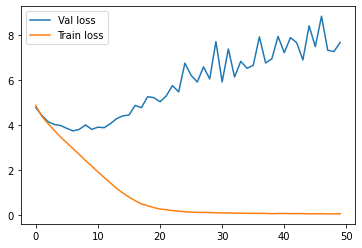

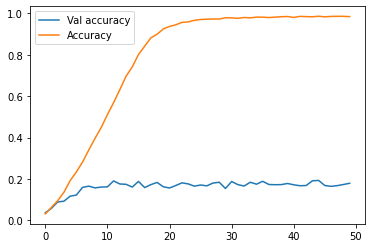

In [26]:
plt.figure()
plt.plot(history_cnn .history["val_loss"], label = "Val loss")
plt.plot(history_cnn .history["loss"], label = "Train loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(history_cnn .history["val_accuracy"], label = "Val accuracy")
plt.plot(history_cnn .history["accuracy"], label = "Accuracy")
plt.legend()
plt.show()